# Gradient Boosted Clasification

In [1]:
import numpy as np
from itertools import islice

from sklearn.ensemble import (GradientBoostingRegressor, 
                              GradientBoostingClassifier, 
                              AdaBoostClassifier,
                              RandomForestClassifier)

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

/Users/matthewdrury/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:800: MatplotlibDeprecationWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  mplDeprecation)


In [2]:
def make_mixed_classification_data(N_centers=10, N_per_center=50):
    class_centers = np.random.uniform(-1, 1, size=(2*N_centers, 2))
    cov_matrix = 0.075*np.array([[1, 0], [0, 1]])
    X = np.concatenate([
        np.random.multivariate_normal((x, y), cov_matrix, size=N_per_center) 
        for x, y in class_centers]).squeeze()
    class_labels = np.concatenate([
        np.repeat(0, N_centers*N_per_center), np.repeat(1, N_centers*N_per_center)
    ]).squeeze()
    return class_centers, X, class_labels

In [3]:
class_centers, X, class_labels = make_mixed_classification_data(5)

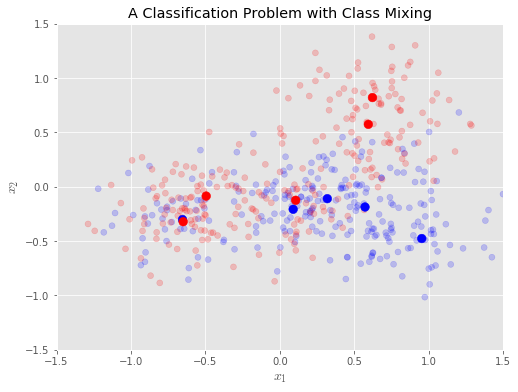

In [4]:
colors = np.array(['blue', 'red'])

def plot_mixed_data(ax, class_centers, X, class_labels):
    ax.scatter(X[:, 0], X[:, 1], c=colors[class_labels], alpha=0.2)
    center_colors = np.concatenate([
        np.repeat(0, class_centers.shape[0] // 2), 
        np.repeat(1, class_centers.shape[0] // 2)
    ])    
    ax.scatter(class_centers[:, 0], class_centers[:, 1], 
                c=np.array(["blue", "red"])[center_colors], 
                marker='o', s=75)
    ax.set_xlabel('$x_1$', fontsize=14) 
    ax.set_ylabel('$x_2$', fontsize=14)
    ax.set_title("A Classification Problem with Class Mixing")
    ax.legend(loc="upper left")
    ax.set_xlim([-1.5, 1.5])
    ax.set_ylim([-1.5, 1.5])

fig, ax = plt.subplots(figsize=(8, 6))
plot_mixed_data(ax, class_centers, X, class_labels)

In [5]:
model = GradientBoostingClassifier(learning_rate=0.01,
                                   n_estimators=500,
                                   min_samples_leaf=5,
                                   max_depth=2,
                                   subsample=0.5)
model.fit(X, class_labels)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=2,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=5, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=500,
              presort='auto', random_state=None, subsample=0.5, verbose=0,
              warm_start=False)

In [6]:
def plot_predictions(ax, model, n_tree=None):
    gx = np.linspace(-1.5, 1.5, 500)
    gy = np.linspace(-1.5, 1.5, 500)
    meshx, meshy = np.meshgrid(gx, gy)
    grid = np.vstack([meshx.flatten(), meshy.flatten()]).T
    
    if n_trees:
        p_hats = model.staged_predict_proba(grid)
        p_hat = next(islice(p_hats, n_tree, n_tree + 1))[:, 0]
    else:
        p_hat = model.predict_proba(grid)[:, 0].flatten()
    
    ax.contourf(meshx, meshy, p_hat.reshape(meshx.shape), 
                 levels=np.linspace(0, 1, 20), 
                 alpha=0.4, cmap=plt.cm.bwr_r,
                 label="Fit Decision Boundary")
    #plt.xlabel('$x_1$', fontsize=14); plt.ylabel('$x_2$', fontsize=14)
    #plt.title("Boosted Logistic Classifier")
    #plt.legend(loc="upper left")
    #plt.xlim([-1.5, 1.5])
    #plt.ylim([-1.5, 1.5])

/Users/matthewdrury/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'label'
  s)


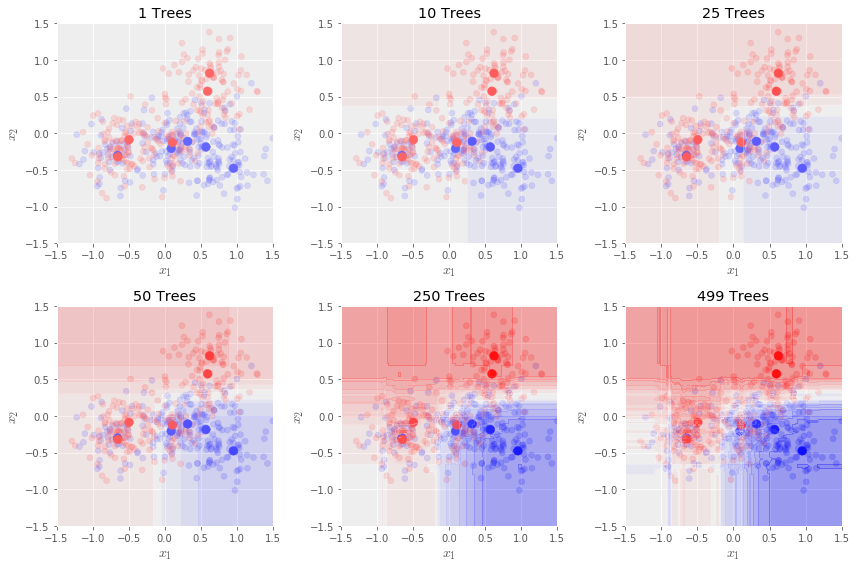

In [9]:
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

n_trees = [1, 10, 25, 50, 250, 499]
for ax, n_tree in zip(axs.flatten(), n_trees):
    plot_mixed_data(ax, class_centers, X, class_labels)
    plot_predictions(ax, model, n_tree=n_tree)
    ax.set_title("{} Trees".format(n_tree))
    
fig.tight_layout()